<a href="https://www.kaggle.com/code/tytibbets/predicting-climate-change-data-with-python?scriptVersionId=138720372" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Examining Climate Change Data with Python**

Everyone knows that climate change has been a huge topic as of late. Some people say it's not happening, while others say that it is the biggest threat to life on Earth. I will be examining temperature data from as far back as the 1700s and seeing if I can find any correlation in the dataset.

In [1]:
import pandas as pd

# **Loading in the dataset to a dataframe**

In [2]:
temps_df = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')

**Examining the dataframe**

In [3]:
temps_df.shape

(577462, 4)

In [4]:
temps_df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


# **Describing the Data**

This gives us a rough overview of the average temperature over the time period the data spans

In [5]:
temps_df.AverageTemperature.describe()

count    544811.000000
mean         17.193354
std          10.953966
min         -37.658000
25%          10.025000
50%          20.901000
75%          25.814000
max          38.842000
Name: AverageTemperature, dtype: float64

# **Checking for missing values**

In [6]:
temps_df[pd.isnull(temps_df.AverageTemperature)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
9,1744-08-01,NaN,NaN,Åland
...,...,...,...,...
575800,1875-04-01,NaN,NaN,Zimbabwe
575852,1879-08-01,NaN,NaN,Zimbabwe
575853,1879-09-01,NaN,NaN,Zimbabwe
575854,1879-10-01,NaN,NaN,Zimbabwe


# **Dropping any missing data to clean the dataset**

In [7]:
temps_clean_df = temps_df.dropna()


In [8]:
temps_clean_df[pd.isnull(temps_clean_df.AverageTemperature)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country


# **Plotting the data with Seaborn**

In [9]:
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: >

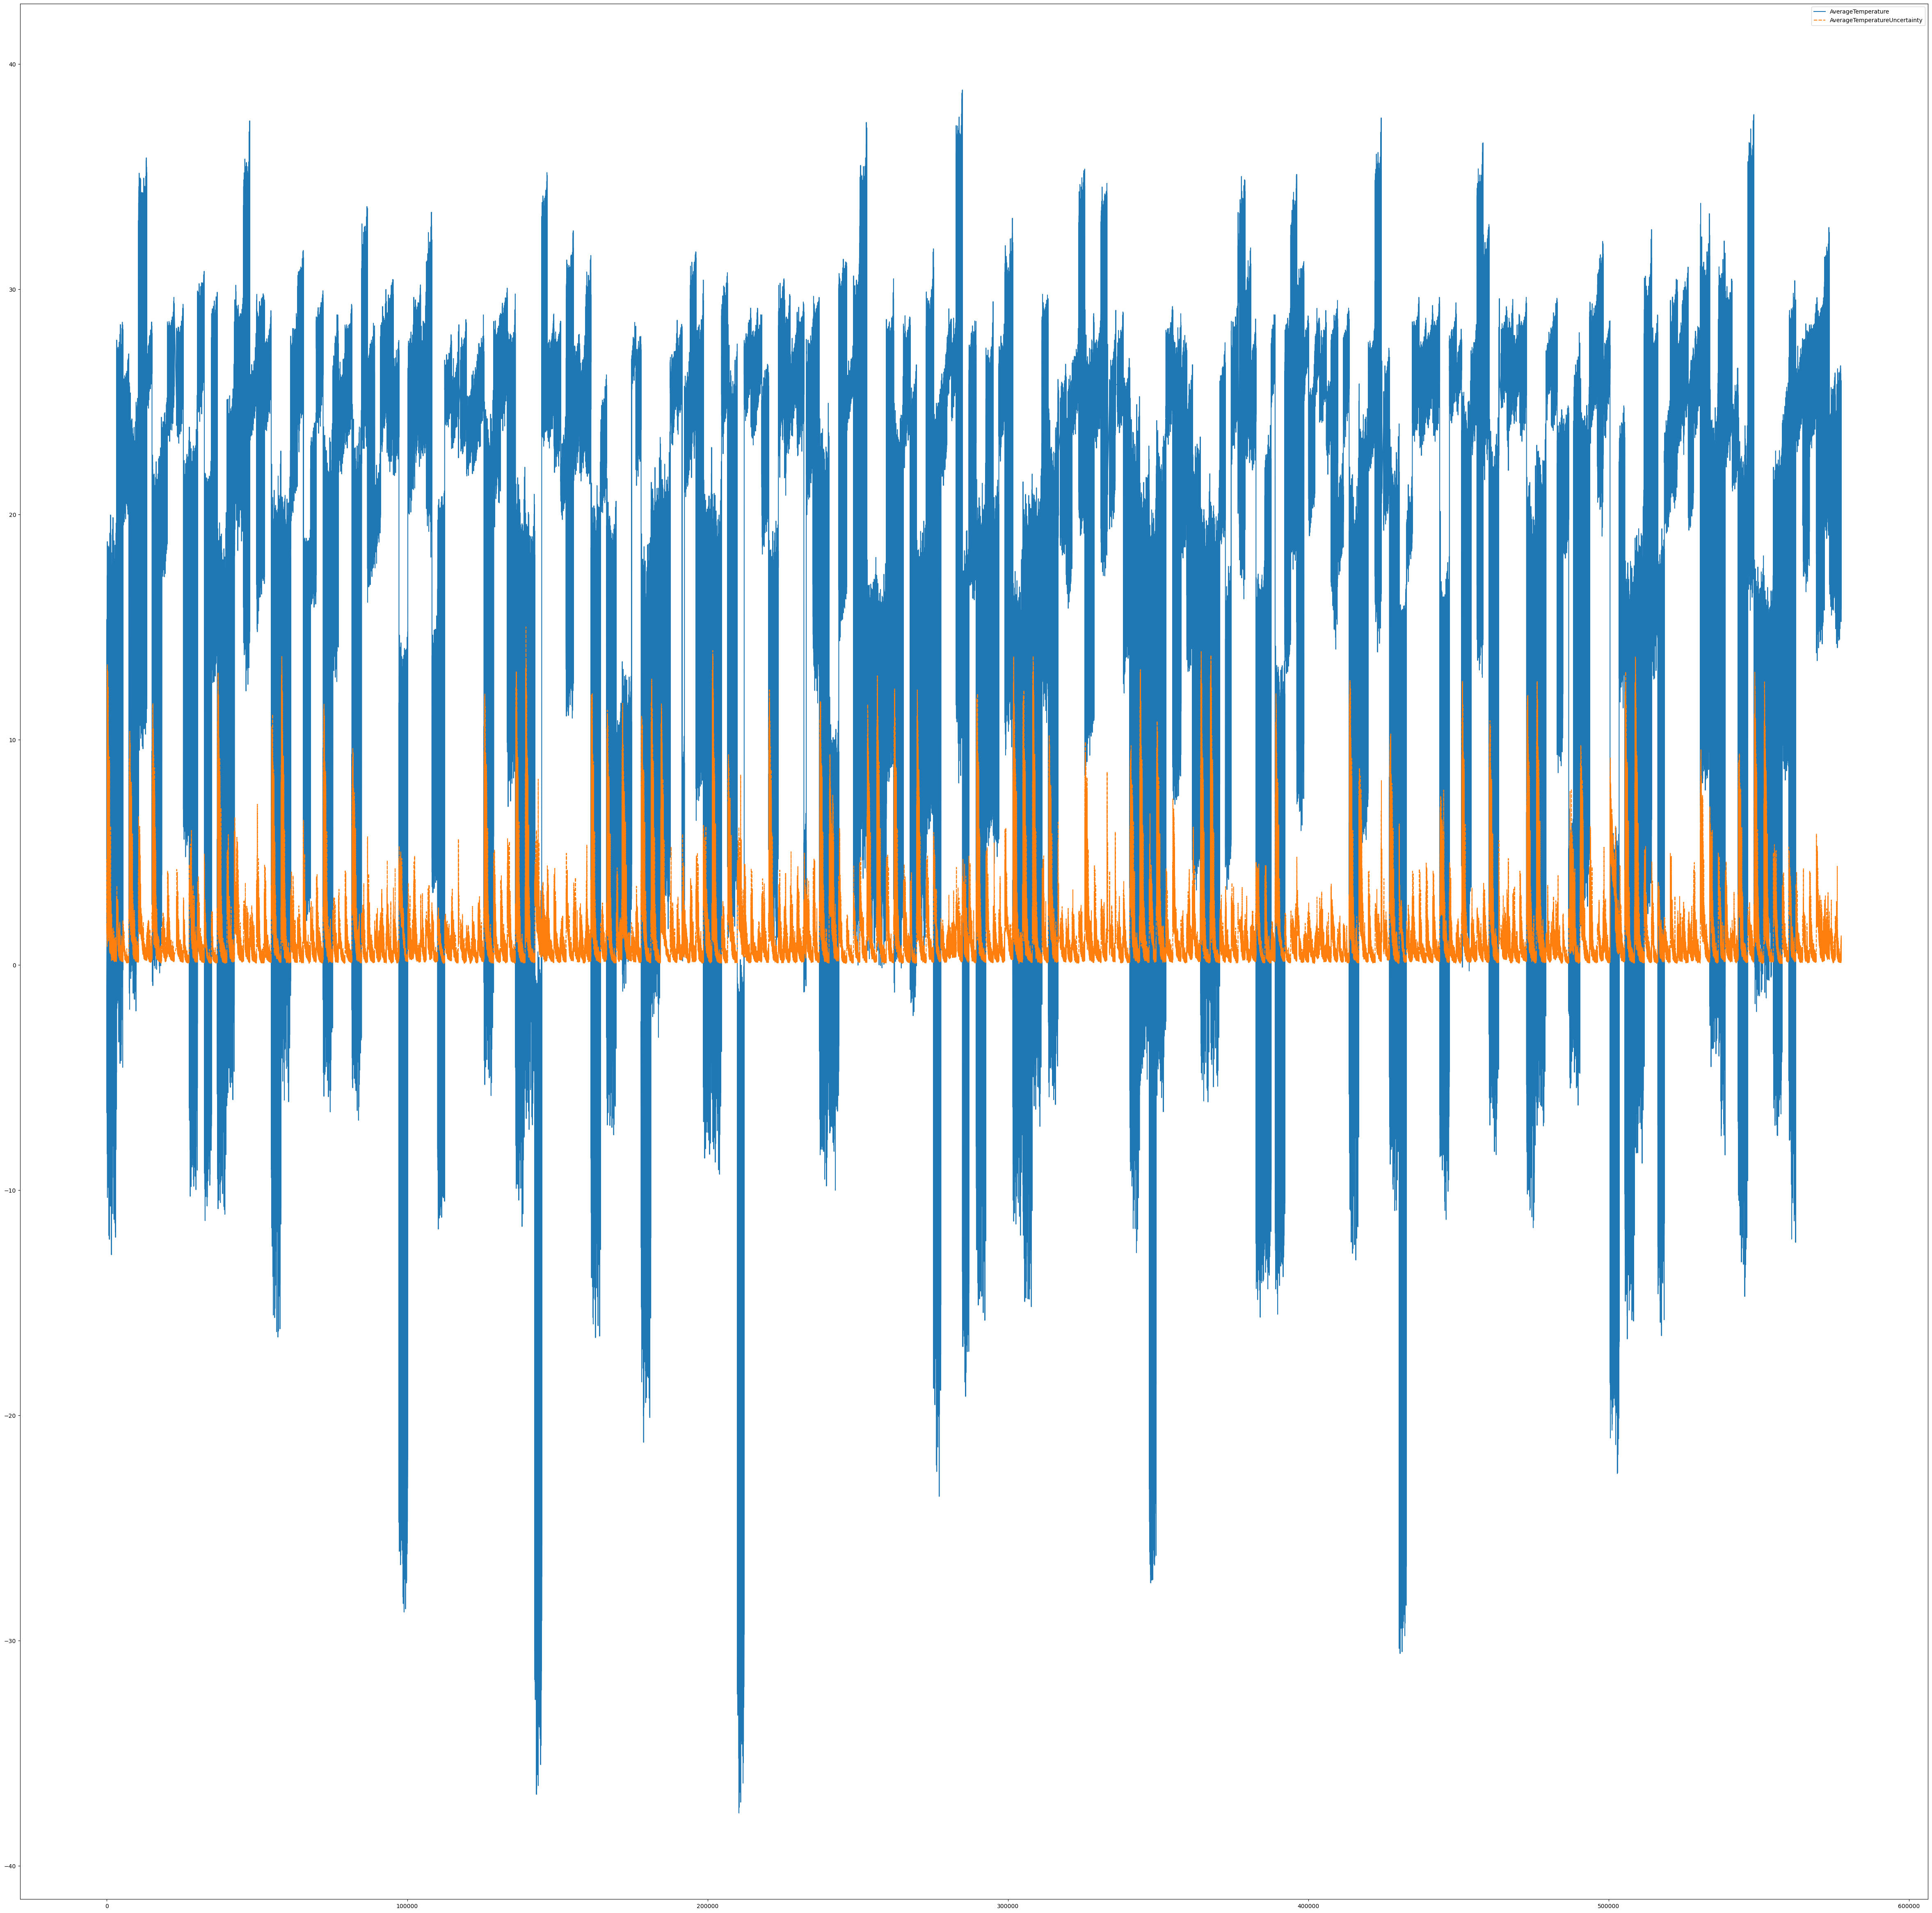

In [10]:
plt.figure(figsize=(60,60))
sns.lineplot(data=temps_clean_df)

# **Importing tools to make a model that can predict temperatures in the future based on the data**

In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
temps_clean_df = temps_clean_df.copy()
temps_clean_df['dt'] = pd.to_datetime(temps_clean_df['dt'])
temps_clean_df['Year'] = temps_clean_df['dt'].dt.year

# **Splitting the dataframe**

In [13]:
X = temps_clean_df[['Year']]
y = temps_clean_df['AverageTemperature']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Adding the model / Linear Regression**

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# **Predicting future temps**

In [15]:
last_year = temps_clean_df['Year'].max()
years_ahead = [last_year + 50, last_year + 100, last_year + 200, last_year + 500]
future_years = pd.DataFrame({'Year': years_ahead})

predicted_temperatures = model.predict(future_years)

# **Visualizing the Data**

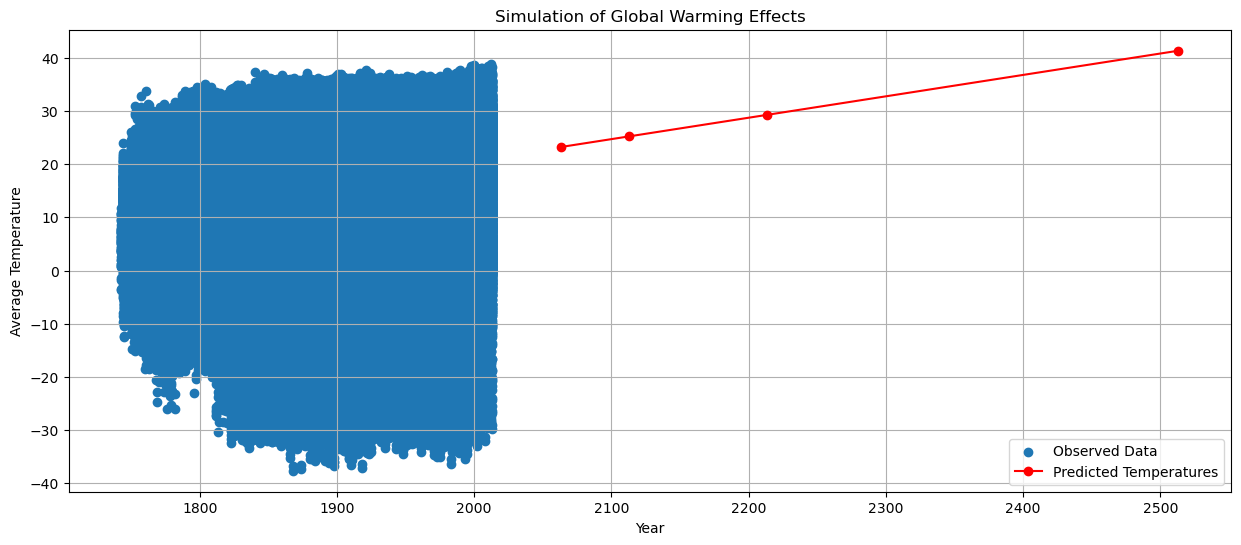

In [16]:
plt.figure(figsize=(15, 6))
plt.scatter(temps_clean_df['Year'], temps_clean_df['AverageTemperature'], label='Observed Data')
plt.plot(future_years['Year'], predicted_temperatures, 'ro-', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

# **Evaluating Accuracy of Model**

In [17]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [18]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared score:", r2)


Mean Squared Error: 113.52846169058924
Root Mean Squared Error: 10.654973565926348
Mean Absolute Error: 8.554074444204808
R-squared score: 0.05628698363537432


# **Visualizing Accuracy**

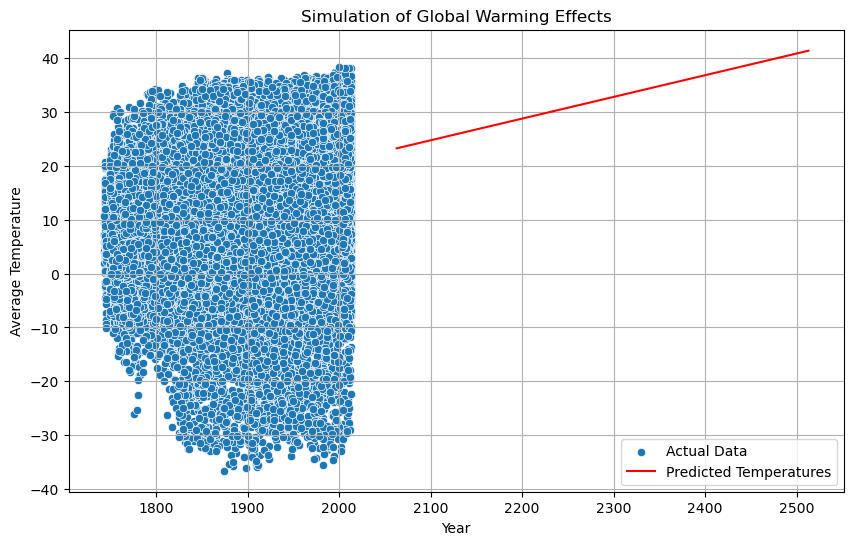

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Year'], y=y_test, label='Actual Data')
sns.lineplot(x=future_years['Year'], y=predicted_temperatures, color='red', label='Predicted Temperatures')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects')
plt.legend()
plt.grid(True)
plt.show()

# **Evaluating / Forecasting with ElasticNet**

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

In [21]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Hyperparameter Tuning with GridSearchCV
param_grid = {
    'alpha': [0.87, 0.095, 0.0117],
    'l1_ratio': [0.1, 0.5, 1.0]
}

grid_search = GridSearchCV(ElasticNet(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

best_alpha = grid_search.best_params_['alpha']
best_l1_ratio = grid_search.best_params_['l1_ratio']

print("Best alpha:", best_alpha)
print("Best l1_ratio:", best_l1_ratio)

Best alpha: 0.0117
Best l1_ratio: 1.0


In [23]:
# Train the ElasticNet model with the best hyperparameters
model = ElasticNet(alpha=best_alpha, l1_ratio=best_l1_ratio, max_iter=1000)
model.fit(X_train_scaled, y_train)

ElasticNet(alpha=0.0117, l1_ratio=1.0)

In [24]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared score:", r2)

Mean Squared Error: 113.52890561178339
R-squared score: 0.05628329351042305


In [25]:
# Predict future temperatures at 50-year intervals up to 2200
future_years = pd.DataFrame({'Year': np.arange(1750, 3000, 50)})
future_years_scaled = scaler.transform(future_years)
predicted_temperatures = model.predict(future_years_scaled)


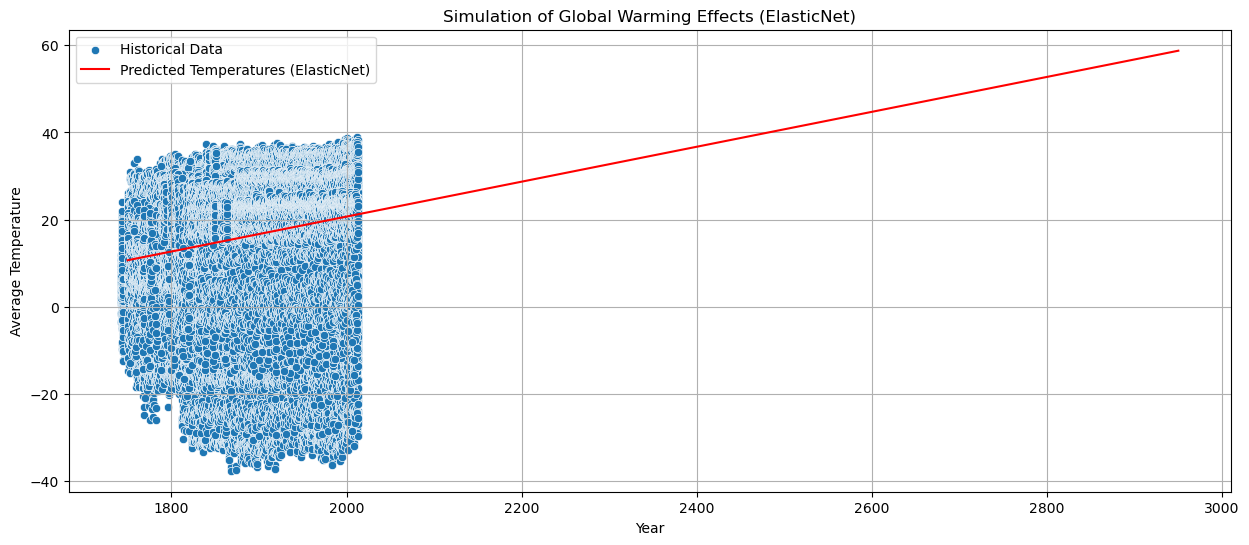

In [26]:
# Visualization
plt.figure(figsize=(15, 6))
sns.scatterplot(x=X['Year'], y=y, label='Historical Data')
sns.lineplot(x=future_years['Year'], y=predicted_temperatures, color='red', label='Predicted Temperatures (ElasticNet)')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Simulation of Global Warming Effects (ElasticNet)')
plt.legend()
plt.grid(True)
plt.show()

# **Outcome**

Based on the prediction, even within about 200 years we will have already reached an incredibly dangerous global average. Right now the global temperature average is about 15ish degrees Celsius (give or take), at 200 years the ML model predicted we could see a change in +27.5 degrees Celsius (about) and at 500 years we would be sitting at around a 40 degrees Celsius global average.. 


# **The Possible Outcome of this Simulation?**

Human Health: Higher temperatures can lead to heat-related illnesses and fatalities. The increased frequency and intensity of heatwaves would pose a significant risk to vulnerable populations, including the elderly, children, and those with pre-existing health conditions.

Ecosystem Disruption: Many ecosystems and species are adapted to specific temperature ranges. A sudden and extreme increase in temperature could disrupt these ecosystems, leading to species extinction, loss of biodiversity, and imbalances in natural food chains.

Agriculture and Food Security: Extreme temperatures can negatively impact agricultural productivity. Crops may fail, leading to food shortages and price spikes. This, in turn, could exacerbate hunger and poverty in many regions.

Water Resources: Higher temperatures can lead to increased evaporation, causing droughts and affecting water availability. This would further strain water resources for human consumption, agriculture, and industry.

Sea Level Rise: Rising global temperatures contribute to the melting of polar ice caps and glaciers. This would lead to a significant increase in sea levels, threatening coastal areas and displacing millions of people living in low-lying regions.

Extreme Weather Events: More heat in the atmosphere can fuel extreme weather events, such as hurricanes, typhoons, and intense storms. These events can cause widespread destruction and loss of life.

Ocean Acidification: Warmer temperatures can also contribute to ocean acidification, which poses a significant threat to marine life, especially coral reefs and shell-forming organisms.

Disruption of Global Climate Patterns: Such a drastic change in temperature could lead to unpredictable shifts in climate patterns, potentially disrupting monsoons, weather cycles, and regional climates, with far-reaching consequences.